In [110]:
!pip install -q twelvedata


In [111]:
from twelvedata import TDClient
td = TDClient(apikey="acec6d1b652e4a4fb7267e6d867d541b")

In [112]:
#import datetime module
import datetime
import pandas as pd

In [113]:
import pytz
paris_timezone = pytz.timezone('Europe/Paris')
current_datetime = datetime.datetime.now(paris_timezone)
print(current_datetime)

2023-06-16 13:19:42.046819+02:00


In [114]:
current_datetime

datetime.datetime(2023, 6, 16, 13, 19, 42, 46819, tzinfo=<DstTzInfo 'Europe/Paris' CEST+2:00:00 DST>)

In [115]:
year = current_datetime.year
month = current_datetime.month
day = current_datetime.day
hour=current_datetime.hour


In [116]:
end = datetime.datetime(year,month,day,hour )
start = end - pd.DateOffset(hours=7000)
print(end)
print(start)
ts = td.time_series(
    symbol="EUR/USD",
    interval="1h",
    start_date=start,
    end_date=end,
    outputsize=5000,
    country="Germany"


).as_pandas()

2023-06-16 13:00:00
2022-08-28 21:00:00


In [117]:
ts.shape

(4991, 4)

In [118]:
ts.head()

,open,high,low,close
datetime,,,,
2023-06-16 20:00:00,1.09490,1.09490,1.0943,1.09480
2023-06-16 19:00:00,1.09502,1.09525,1.0941,1.09476
2023-06-16 18:00:00,1.09410,1.09532,1.0939,1.09500
2023-06-16 17:00:00,1.09470,1.09530,1.0941,1.09417
2023-06-16 16:00:00,1.09430,1.09580,1.0943,1.09570


In [119]:
end = start - pd.DateOffset(hours=1)
start = end - pd.DateOffset(hours=6500)
print(end)
print(start)
ts2 = td.time_series(
    symbol="EUR/USD",
    interval="1h",
    start_date=start,
    end_date=end,
    outputsize=5000,
    country="Germany"


).as_pandas()

2022-08-28 20:00:00
2021-12-01 00:00:00


In [120]:
ts2.shape

(4646, 4)

In [121]:
ts2.tail()

,open,high,low,close
datetime,,,,
2021-12-01 15:00:00,1.13280,1.13320,1.13255,1.13315
2021-12-01 14:00:00,1.13215,1.13315,1.13215,1.13285
2021-12-01 13:00:00,1.13205,1.13240,1.13170,1.13230
2021-12-01 12:00:00,1.13315,1.13330,1.13185,1.13205
2021-12-01 11:00:00,1.13305,1.13370,1.13275,1.13320


In [122]:
end = start - pd.DateOffset(hours=1)
start = end - pd.DateOffset(hours=6500)
print(end)
print(start)
ts3 = td.time_series(
    symbol="EUR/USD",
    interval="1h",
    start_date=start,
    end_date=end,
    outputsize=5000,
    country="Germany"


).as_pandas()

2021-11-30 23:00:00
2021-03-05 03:00:00


In [123]:
ts3.shape

(4610, 4)

In [124]:
import pandas as pd
concatenated_df = pd.concat([ts, ts2, ts3])

In [125]:
concatenated_df.shape

(14247, 4)

In [126]:
ts=concatenated_df

In [127]:
ts = ts.sort_values('datetime', ascending=True)

In [128]:
ts.shape

(14247, 4)

#AI Model

In [129]:
#ignoring warnings
import warnings
warnings.simplefilter('ignore')

#importing neccesary modules
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV, train_test_split

import xgboost
from xgboost import XGBRegressor, DMatrix

In [130]:
def generate_features(df):
    """ Generate features for a stock/index/currency/commodity based on historical price and performance
    Args:
        df (dataframe with columns "open", "close", "high", "low", "volume")
    Returns:
        dataframe, data set with new features
    """
    df_new = pd.DataFrame()

    # 6 original features
    #df_new['open'] = df['open']
    df_new['open_1'] = df['open'].shift(1)
    df_new['close_1'] = df['close'].shift(1)
    df_new['high_1'] = df['high'].shift(1)
    df_new['low_1'] = df['low'].shift(1)


    # 50 original features
    # average price
    df_new['avg_price_5'] = df['close'].rolling(window=5).mean().shift(1)
    df_new['avg_price_30'] = df['close'].rolling(window=21).mean().shift(1)
    df_new['avg_price_90'] = df['close'].rolling(window=63).mean().shift(1)
    df_new['avg_price_365'] = df['close'].rolling(window=252).mean().shift(1)

    # average price ratio
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_905_'] = df_new['avg_price_5'] / df_new['avg_price_90']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_90'] = df_new['avg_price_30'] / df_new['avg_price_90']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    df_new['ratio_avg_price_90_365'] = df_new['avg_price_90'] / df_new['avg_price_365']





    # standard deviation of prices
    df_new['std_price_5'] = df['close'].rolling(window=5).std().shift(1)
    df_new['std_price_30'] = df['close'].rolling(window=21).std().shift(1)
    df_new['std_price_90'] = df['close'].rolling(window=63).std().shift(1)
    df_new['std_price_365'] = df['close'].rolling(window=252).std().shift(1)

    # standard deviation ratio of prices
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_90'] = df_new['std_price_5'] / df_new['std_price_90']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_90'] = df_new['std_price_30'] / df_new['std_price_90']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
    df_new['ratio_std_price_90_365'] = df_new['std_price_90'] / df_new['std_price_365']






    # return
    df_new['return_1'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['close'] - df['close'].shift(5)) / df['close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['close'] - df['close'].shift(21)) / df['close'].shift(21)).shift(1)
    df_new['return_90'] = ((df['close'] - df['close'].shift(63)) / df['close'].shift(63)).shift(1)
    df_new['return_365'] = ((df['close'] - df['close'].shift(252)) / df['close'].shift(252)).shift(1)

    #average of return
    df_new['moving_avg_5'] = df_new['return_1'].rolling(window=5).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=21).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=63).mean()
    df_new['moving_avg_365'] = df_new['return_1'].rolling(window=252).mean()

    # the target
    df_new['close'] = df['close']
    print(df_new.shape)
    df_new = df_new.dropna(axis=0)
    print(df_new.shape)
    return df_new

data = generate_features(ts)

(14247, 33)
(13994, 33)


In [131]:
min_datetime = data.index.min()
max_datetime = data.index.max()

In [132]:
max_datetime

Timestamp('2023-06-16 20:00:00')

In [133]:
min_datetime

Timestamp('2021-03-19 22:00:00')

In [134]:
#import datetime module
import datetime

#segregate data for training
start_train = min_datetime
end_train = max_datetime - pd.DateOffset(hours=1000)
data_train = data.loc[start_train:end_train]
data_train.shape

(13291, 33)

In [135]:
#segregate data for validation


data_test = data.loc[end_train::]
data_test.shape

(704, 33)

In [136]:
#segregate data for validation

data_test_ts = ts.loc[end_train::]
data_test_ts.shape

(704, 4)

In [137]:
X_train = data_train.drop('close', axis='columns')
y_train = data_train.close

X_test = data_test.drop('close', axis='columns')
y_test = data_test.close

#checking the shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13291, 32), (704, 32), (13291,), (704,))

#XGB Model

In [138]:
 """
xgb = XGBRegressor()

data_dmatrix = DMatrix(data=X_train,
                           label=y_train)

xgb_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
                  'n_estimators': [50, 100, 200, 300],
                  'subsample': [0.3, 0.5, 0.7, 1]}

grid_search = GridSearchCV(estimator=xgb,
                        param_grid=xgb_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=4,
                        verbose=1,
                       n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ",grid_search.best_params_)

xgb_best = grid_search.best_estimator_

xgb_best.fit(X_train,y_train)
"""
import pickle
with open('/content/drive/MyDrive/Forex_Predictive_Model/xgb_best_1h.pkl', 'rb') as file:
    xgb_best = pickle.load(file)

predictions_xgb = xgb_best.predict(X_test)
 """
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_xgb)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_xgb)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_xgb)))
 """

"\nprint('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_xgb)**0.5))\nprint('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_xgb)))\nprint('R^2: {0:.3f}'.format(r2_score(y_test, predictions_xgb)))\n"

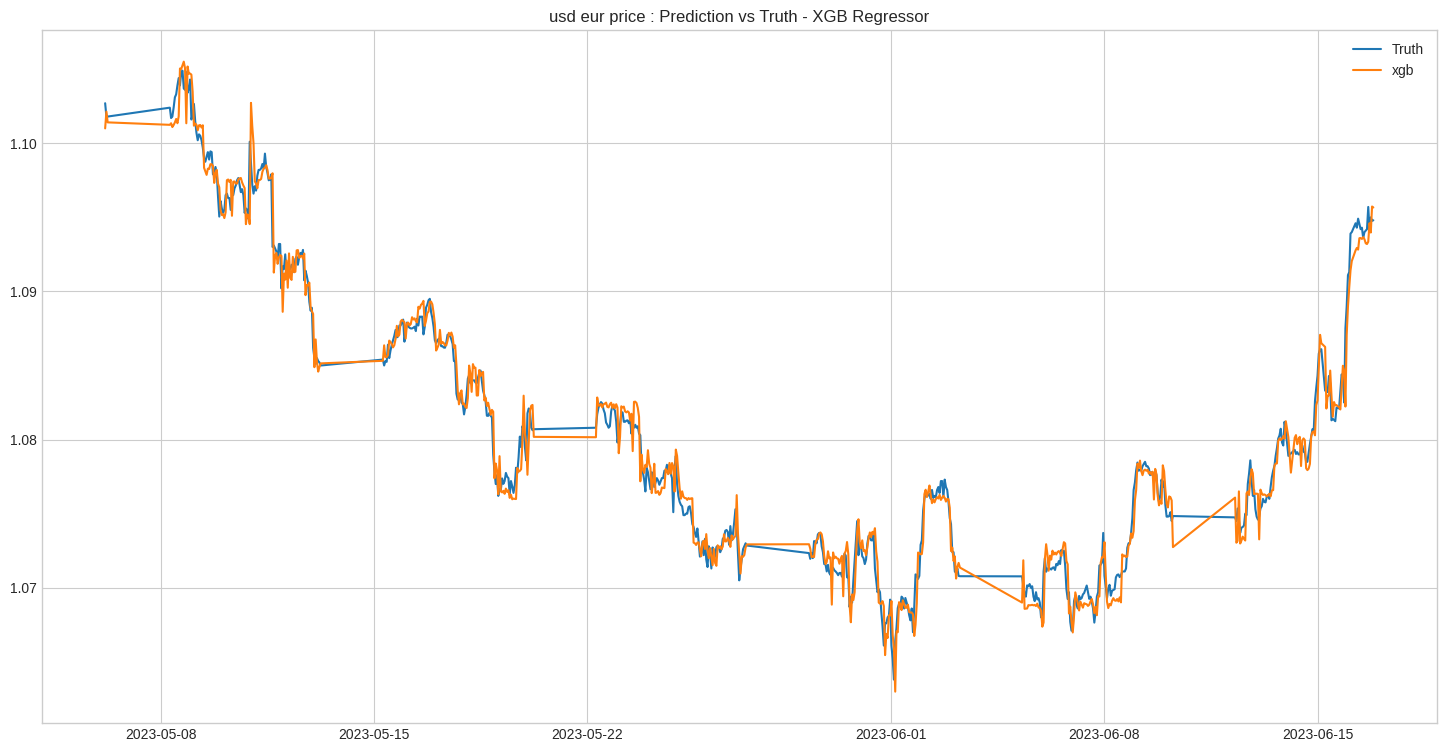

In [139]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plot_truth, = plt.plot(dates, y_test)
plot_xgb, = plt.plot(dates, predictions_xgb)
plt.legend([plot_truth, plot_xgb], ['Truth', 'xgb'])
plt.title('usd eur price : Prediction vs Truth - XGB Regressor')
plt.show()

In [140]:
data2=data_test.copy()

In [141]:
#segregate data for validation

data_test_ts = ts.loc[end_train::]
data_test_ts.shape

(704, 4)

In [142]:
for i in range(5):
  # Get the maximum datetime value
  max_datetime = data2.index.max()

  # Generate the next minute timestamps
  next_minute = max_datetime + pd.DateOffset(hours=1)

  new_row = pd.DataFrame({
  'open_1': data_test_ts['open'].shift(1)[-1],
  'close_1': data_test_ts['close'].shift(1)[-1],
  'high_1': data_test_ts['high'].shift(1)[-1],
  'low_1': data_test_ts['low'].shift(1)[-1]

  },

      index=[next_minute])

  data2 = pd.concat([data2, new_row])


  data2.loc[next_minute]['avg_price_5'] = data_test_ts['close'].rolling(window=5, min_periods=1).mean()[-1]
  data2.loc[next_minute][    'avg_price_30'] = data_test_ts['close'].rolling(window=21).mean()[-1]
  data2.loc[next_minute][    'avg_price_90'] =data_test_ts['close'].rolling(window=63).mean()[-1]
  data2.loc[next_minute][    'avg_price_365' ]=data_test_ts['close'].rolling(window=252).mean()[-1]

  data2.loc[next_minute][    'ratio_avg_price_5_30' ]= data2.loc[next_minute]['avg_price_5'] / data2.loc[next_minute]['avg_price_30']
  data2.loc[next_minute][    'ratio_avg_price_905_' ]=data2.loc[next_minute]['avg_price_5'] / data2.loc[next_minute]['avg_price_90']
  data2.loc[next_minute][    'ratio_avg_price_5_365'] =data2.loc[next_minute]['avg_price_5'] / data2.loc[next_minute]['avg_price_365']
  data2.loc[next_minute][   'ratio_avg_price_30_90' ]= data2.loc[next_minute]['avg_price_30'] / data2.loc[next_minute]['avg_price_90']
  data2.loc[next_minute][   'ratio_avg_price_30_365'] = data2.loc[next_minute]['avg_price_30'] / data2.loc[next_minute]['avg_price_365']
  data2.loc[next_minute][    'ratio_avg_price_90_365'] = data2.loc[next_minute]['avg_price_90'] / data2.loc[next_minute]['avg_price_365']

  data2.loc[next_minute][    'std_price_5' ]= data_test_ts['close'].rolling(window=5).std()[-1]
  data2.loc[next_minute][    'std_price_30' ]= data_test_ts['close'].rolling(window=21).std()[-1]
  data2.loc[next_minute][    'std_price_90'] = data_test_ts['close'].rolling(window=63).std()[-1]
  data2.loc[next_minute][    'std_price_365'] = data_test_ts['close'].rolling(window=252).std()[-1]

  data2.loc[next_minute][    'ratio_std_price_5_30'] = data2.loc[next_minute]['std_price_5'] / data2.loc[next_minute]['std_price_30']
  data2.loc[next_minute][    'ratio_std_price_5_90']= data2.loc[next_minute]['std_price_5'] / data2.loc[next_minute]['std_price_90']
  data2.loc[next_minute][    'ratio_std_price_5_365'] = data2.loc[next_minute]['std_price_5'] / data2.loc[next_minute]['std_price_365']
  data2.loc[next_minute][    'ratio_std_price_30_90'] = data2.loc[next_minute]['std_price_30'] / data2.loc[next_minute]['std_price_90']
  data2.loc[next_minute][    'ratio_std_price_30_365'] = data2.loc[next_minute]['std_price_30'] / data2.loc[next_minute]['std_price_365']
  data2.loc[next_minute][    'ratio_std_price_90_365'] = data2.loc[next_minute]['std_price_90'] / data2.loc[next_minute]['std_price_365']

  data2.loc[next_minute][    'return_1'] = ((data_test_ts['close'] - data_test_ts['close'].shift(1)) / data_test_ts['close'].shift(1)).shift(1)[-1]
  data2.loc[next_minute][    'return_5']= ((data_test_ts['close'] - data_test_ts['close'].shift(5)) / data_test_ts['close'].shift(5)).shift(1)[-1]
  data2.loc[next_minute][    'return_30'] = ((data_test_ts['close'] - data_test_ts['close'].shift(21)) / data_test_ts['close'].shift(21)).shift(1)[-1]
  data2.loc[next_minute][   'return_90'] = ((data_test_ts['close'] - data_test_ts['close'].shift(63)) / data_test_ts['close'].shift(63)).shift(1)[-1]
  data2.loc[next_minute][    'return_365'] = ((data_test_ts['close'] - data_test_ts['close'].shift(252)) / data_test_ts['close'].shift(252)).shift(1)[-1]




  #data2 = pd.concat([data2, new_row])


  data2.loc[next_minute][    'moving_avg_5'] = data2['return_1'].rolling(window=5).mean()[-1]
  data2.loc[next_minute][   'moving_avg_30'] = data2['return_1'].rolling(window=21).mean()[-1]
  data2.loc[next_minute][   'moving_avg_30'] = data2['return_1'].rolling(window=63).mean()[-1]
  data2.loc[next_minute][   'moving_avg_365'] = data2['return_1'].rolling(window=252).mean()[-1]

  instance = data2.loc[next_minute].drop('close').values.reshape(1, -1)

  close = xgb_best.predict(instance)
  data2.loc[next_minute]["close"]=close


  new_row2 = pd.DataFrame({
  'open': data2.loc[next_minute]['open_1'],
  'close': data2.loc[next_minute]['close'],
  'high': data2.loc[next_minute]['high_1'],
  'low': data2.loc[next_minute]['low_1']

  },

      index=[next_minute])

  data_test_ts = pd.concat([data_test_ts, new_row2])


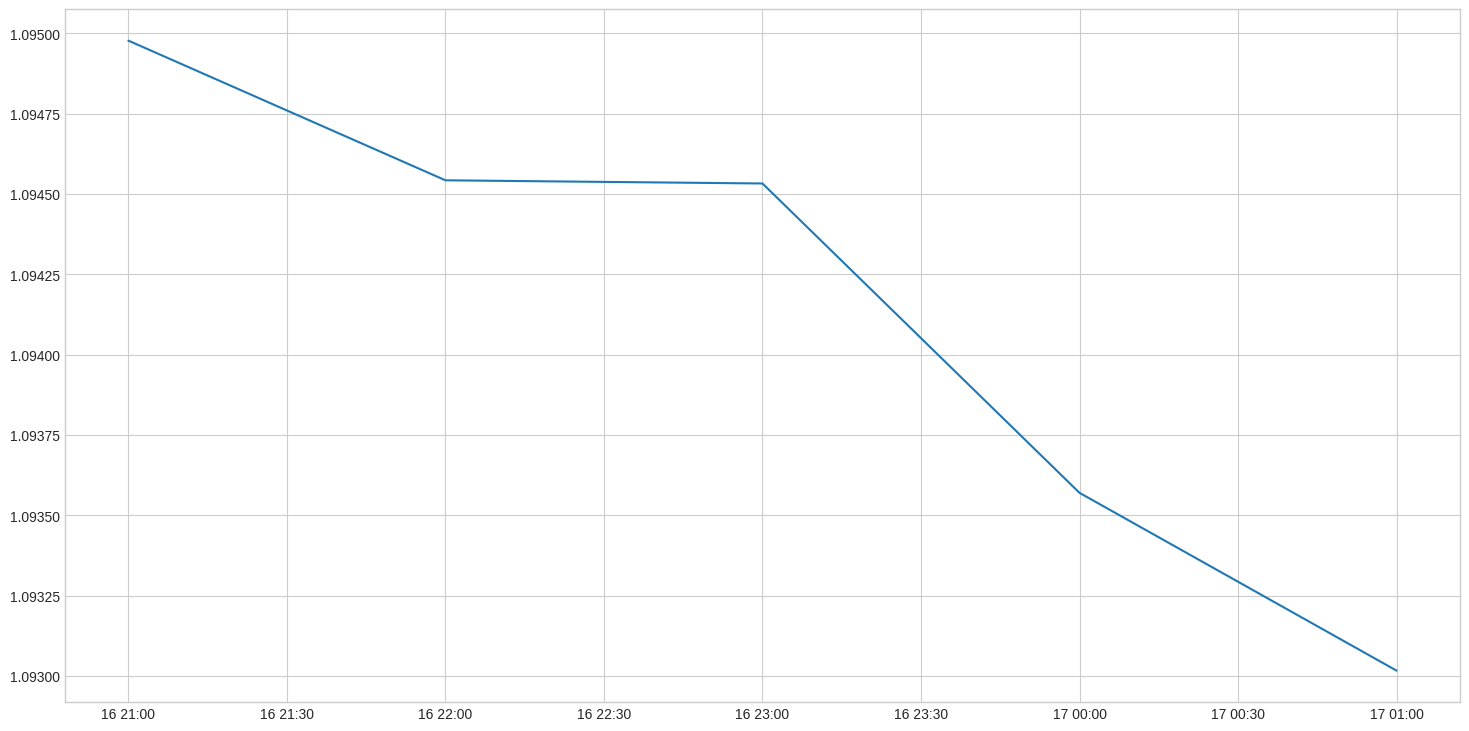

In [143]:
dates = data_test_ts.index.values[-5::]
plt.figure(figsize = (18,9))
plt.style.use('seaborn-whitegrid')
plt.plot(dates, data_test_ts.close[-5::])
plt.show()

#Linear regression Model

In [144]:
#import datetime module
import datetime

#segregate data for training
start_train = min_datetime
end_train = max_datetime - pd.DateOffset(hours=1000)
data_train = data.loc[start_train:end_train]
data_train.shape

(13293, 33)

In [145]:
#segregate data for validation


data_test = data.loc[end_train::]
data_test.shape

(701, 33)

In [146]:
#segregate data for validation

data_test_ts = ts.loc[end_train::]
data_test_ts.shape

(701, 4)

In [147]:
X_train = data_train.drop('close', axis='columns')
y_train = data_train.close

X_test = data_test.drop('close', axis='columns')
y_test = data_test.close

#checking the shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13293, 32), (701, 32), (13293,), (701,))

In [148]:
#initiating standard scaler
scaler = StandardScaler()

#fit the scaler in training features
scaler.fit(X_train)

#Rescale both sets using the trained scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [149]:
"""
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_scaled_train, y_train)
"""
import pickle
with open('/content/drive/MyDrive/Forex_Predictive_Model/lin_1h.pkl', 'rb') as file:
    lin = pickle.load(file)

predictions_lin = lin.predict(X_scaled_test)
"""
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lin)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lin)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lin)))
"""

"\nprint('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lin)**0.5))\nprint('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lin)))\nprint('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lin)))\n"

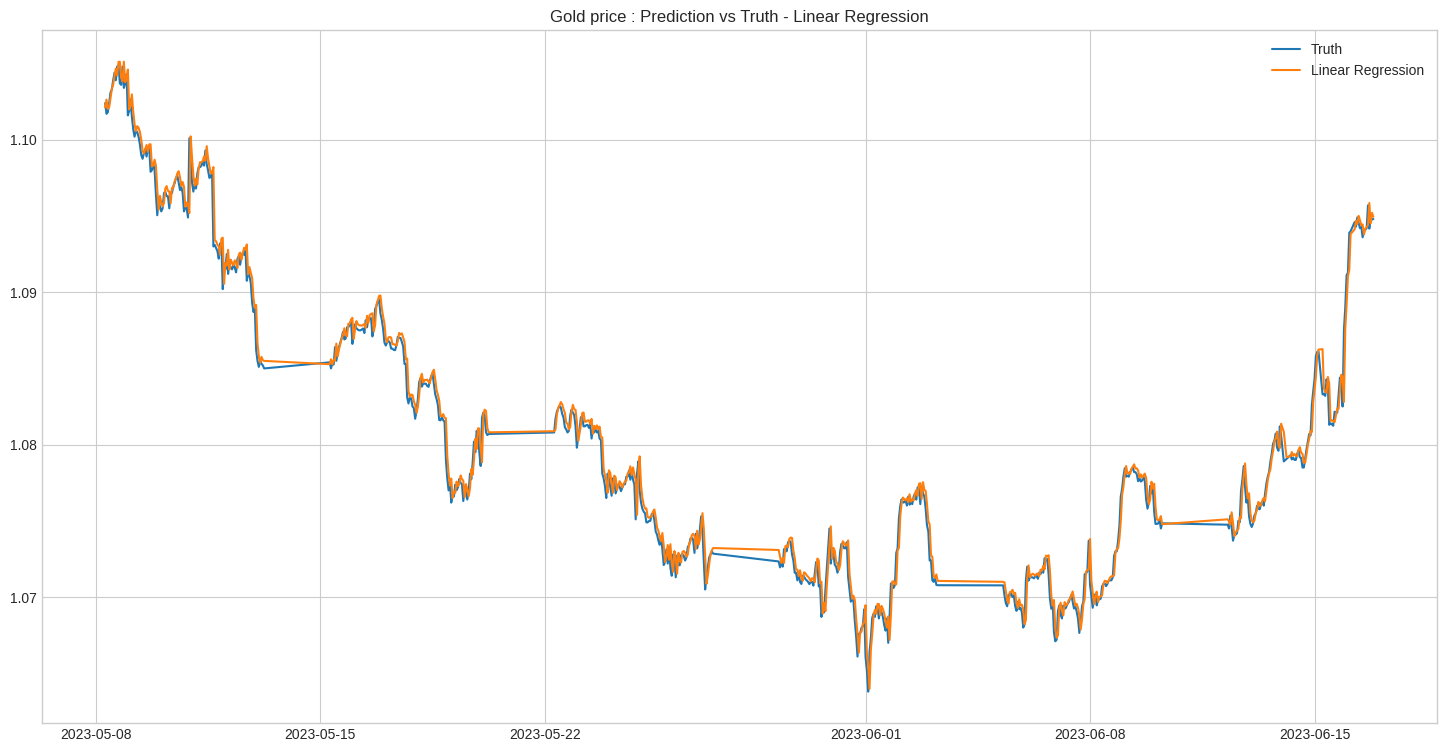

In [150]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plt.style.use('seaborn-whitegrid')
plot_truth, = plt.plot(dates, y_test)
plot_lin, = plt.plot(dates, predictions_lin)
plt.legend([plot_truth, plot_lin], ['Truth', 'Linear Regression'])
plt.title('Gold price : Prediction vs Truth - Linear Regression')
plt.show()

In [151]:
data2=data_test.copy()

In [152]:
#segregate data for validation

data_test_ts = ts.loc[end_train::]
data_test_ts.shape

(701, 4)

In [153]:
for i in range(5):
  # Get the maximum datetime value
  max_datetime = data2.index.max()

  # Generate the next minute timestamps
  next_minute = max_datetime + pd.DateOffset(hours=1)

  new_row = pd.DataFrame({
  'open_1': data_test_ts['open'].shift(1)[-1],
  'close_1': data_test_ts['close'].shift(1)[-1],
  'high_1': data_test_ts['high'].shift(1)[-1],
  'low_1': data_test_ts['low'].shift(1)[-1]

  },

      index=[next_minute])

  data2 = pd.concat([data2, new_row])


  data2.loc[next_minute]['avg_price_5'] = data_test_ts['close'].rolling(window=5, min_periods=1).mean()[-1]
  data2.loc[next_minute][    'avg_price_30'] = data_test_ts['close'].rolling(window=21).mean()[-1]
  data2.loc[next_minute][    'avg_price_90'] =data_test_ts['close'].rolling(window=63).mean()[-1]
  data2.loc[next_minute][    'avg_price_365' ]=data_test_ts['close'].rolling(window=252).mean()[-1]

  data2.loc[next_minute][    'ratio_avg_price_5_30' ]= data2.loc[next_minute]['avg_price_5'] / data2.loc[next_minute]['avg_price_30']
  data2.loc[next_minute][    'ratio_avg_price_905_' ]=data2.loc[next_minute]['avg_price_5'] / data2.loc[next_minute]['avg_price_90']
  data2.loc[next_minute][    'ratio_avg_price_5_365'] =data2.loc[next_minute]['avg_price_5'] / data2.loc[next_minute]['avg_price_365']
  data2.loc[next_minute][   'ratio_avg_price_30_90' ]= data2.loc[next_minute]['avg_price_30'] / data2.loc[next_minute]['avg_price_90']
  data2.loc[next_minute][   'ratio_avg_price_30_365'] = data2.loc[next_minute]['avg_price_30'] / data2.loc[next_minute]['avg_price_365']
  data2.loc[next_minute][    'ratio_avg_price_90_365'] = data2.loc[next_minute]['avg_price_90'] / data2.loc[next_minute]['avg_price_365']

  data2.loc[next_minute][    'std_price_5' ]= data_test_ts['close'].rolling(window=5).std()[-1]
  data2.loc[next_minute][    'std_price_30' ]= data_test_ts['close'].rolling(window=21).std()[-1]
  data2.loc[next_minute][    'std_price_90'] = data_test_ts['close'].rolling(window=63).std()[-1]
  data2.loc[next_minute][    'std_price_365'] = data_test_ts['close'].rolling(window=252).std()[-1]

  data2.loc[next_minute][    'ratio_std_price_5_30'] = data2.loc[next_minute]['std_price_5'] / data2.loc[next_minute]['std_price_30']
  data2.loc[next_minute][    'ratio_std_price_5_90']= data2.loc[next_minute]['std_price_5'] / data2.loc[next_minute]['std_price_90']
  data2.loc[next_minute][    'ratio_std_price_5_365'] = data2.loc[next_minute]['std_price_5'] / data2.loc[next_minute]['std_price_365']
  data2.loc[next_minute][    'ratio_std_price_30_90'] = data2.loc[next_minute]['std_price_30'] / data2.loc[next_minute]['std_price_90']
  data2.loc[next_minute][    'ratio_std_price_30_365'] = data2.loc[next_minute]['std_price_30'] / data2.loc[next_minute]['std_price_365']
  data2.loc[next_minute][    'ratio_std_price_90_365'] = data2.loc[next_minute]['std_price_90'] / data2.loc[next_minute]['std_price_365']

  data2.loc[next_minute][    'return_1'] = ((data_test_ts['close'] - data_test_ts['close'].shift(1)) / data_test_ts['close'].shift(1)).shift(1)[-1]
  data2.loc[next_minute][    'return_5']= ((data_test_ts['close'] - data_test_ts['close'].shift(5)) / data_test_ts['close'].shift(5)).shift(1)[-1]
  data2.loc[next_minute][    'return_30'] = ((data_test_ts['close'] - data_test_ts['close'].shift(21)) / data_test_ts['close'].shift(21)).shift(1)[-1]
  data2.loc[next_minute][   'return_90'] = ((data_test_ts['close'] - data_test_ts['close'].shift(63)) / data_test_ts['close'].shift(63)).shift(1)[-1]
  data2.loc[next_minute][    'return_365'] = ((data_test_ts['close'] - data_test_ts['close'].shift(252)) / data_test_ts['close'].shift(252)).shift(1)[-1]




  #data2 = pd.concat([data2, new_row])


  data2.loc[next_minute][    'moving_avg_5'] = data2['return_1'].rolling(window=5).mean()[-1]
  data2.loc[next_minute][   'moving_avg_30'] = data2['return_1'].rolling(window=21).mean()[-1]
  data2.loc[next_minute][   'moving_avg_30'] = data2['return_1'].rolling(window=63).mean()[-1]
  data2.loc[next_minute][   'moving_avg_365'] = data2['return_1'].rolling(window=252).mean()[-1]

  instance = data2.loc[next_minute].drop('close').values.reshape(1, -1)
  instance_scaled = scaler.transform(instance.reshape(1, -1))
  close = lin.predict(instance_scaled)
  data2.loc[next_minute]["close"]=close


  new_row2 = pd.DataFrame({
  'open': data2.loc[next_minute]['open_1'],
  'close': data2.loc[next_minute]['close'],
  'high': data2.loc[next_minute]['high_1'],
  'low': data2.loc[next_minute]['low_1']

  },

      index=[next_minute])

  data_test_ts = pd.concat([data_test_ts, new_row2])


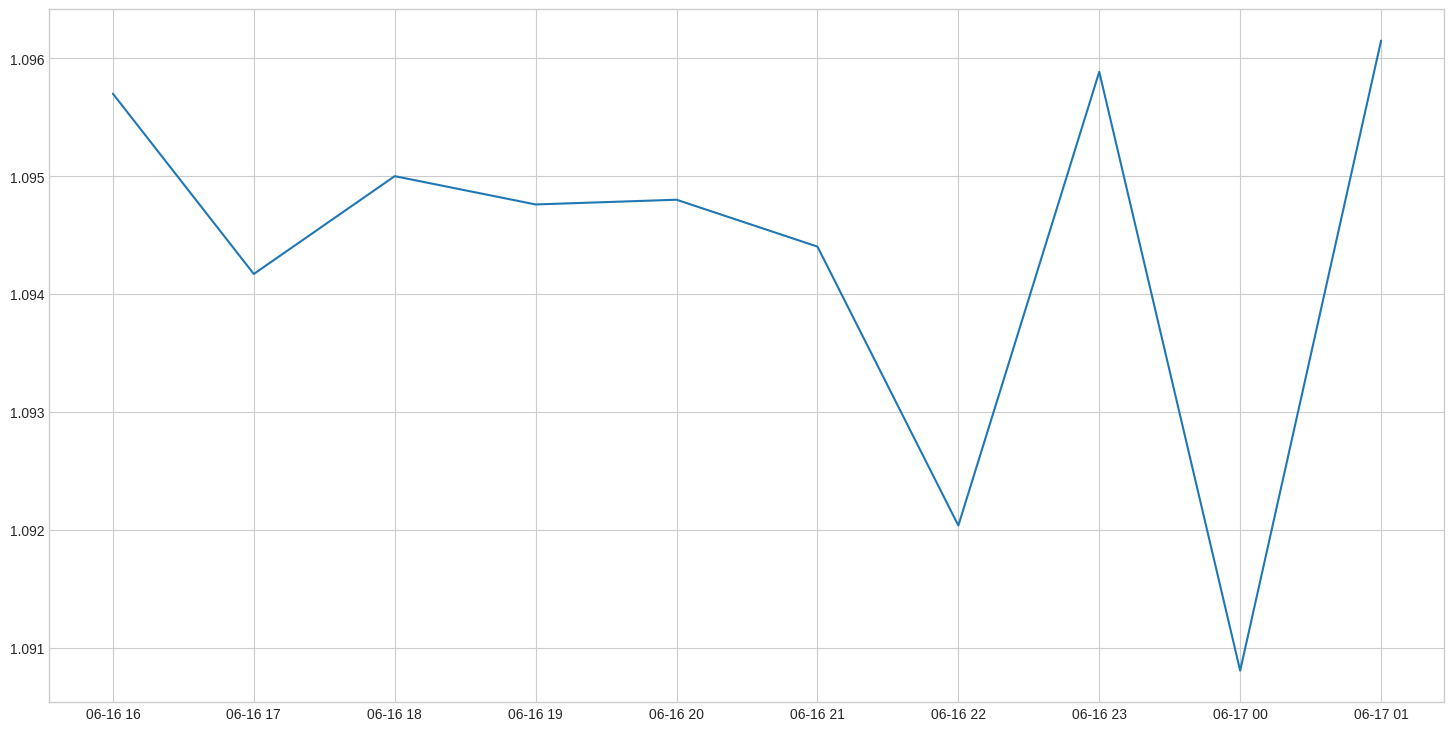

In [154]:
dates = data_test_ts.index.values[-10::]
plt.figure(figsize = (18,9))
plt.style.use('seaborn-whitegrid')
plt.plot(dates, data_test_ts.close[-10::])
plt.show()